In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [5]:
counts_df = pd.read_csv("DGN_family_counts_df.csv")

In [6]:
counts_df

,patid,family,count
0,LD0001,TRAJ1,2
1,LD0001,TRAJ10,37
2,LD0001,TRAJ11,13
3,LD0001,TRAJ12,14
4,LD0001,TRAJ13,27
...,...,...,...
161084,LD1366,TRBV7-8,366
161085,LD1366,TRBV7-9,1079
161086,LD1366,TRBV8-2,2
161087,LD1366,TRBV9,391


In [7]:
# Filter out pseudogenes and non-functional genes
valid_TCR_genes = set()
with open("valid_TCR_genes.txt", "r") as f:
    for line in f:
        valid_TCR_genes.add(line.strip())

In [17]:
pseudogene_counts_df = counts_df[~counts_df['family'].isin(valid_TCR_genes)]
realgene_counts_df = counts_df[counts_df['family'].isin(valid_TCR_genes)]

In [32]:
pseudogene_counts_df['family'].unique()

array(['TRAJ15', 'TRAJ8', 'TRAV15', 'TRAV8-5', 'TRAV8-7', 'TRBJ2-2P',
       'TRBV1', 'TRBV12-1', 'TRBV16', 'TRBV20/OR9-2', 'TRBV21-1',
       'TRBV23-1', 'TRBV23/OR9-2', 'TRBV24/OR9-2', 'TRBV25/OR9-2',
       'TRBV29/OR9-2', 'TRBV3-2', 'TRBV5-3', 'TRBV6-7', 'TRBV7-1',
       'TRBV7-4', 'TRBV7-5', 'TRBV8-2', 'TRBVC', 'TRAJ59', 'TRAV33',
       'TRAV37', 'TRBV12-2', 'TRBV26', 'TRBV26/OR9-2', 'TRAJ60', 'TRBV17',
       'TRBV21/OR9-2', 'TRAJ19', 'TRAV11', 'TRAV28', 'TRBV22-1', 'TRAJ51',
       'TRBV5-2', 'TRBVA/OR9-2', 'TRAJ55', 'TRBVB', 'TRBV8-1', 'TRAV31',
       'TRBVA', 'TRAV32', 'TRBV22/OR9-2'], dtype=object)

Text(0.5, 1.0, 'Pseudogene count distribution')

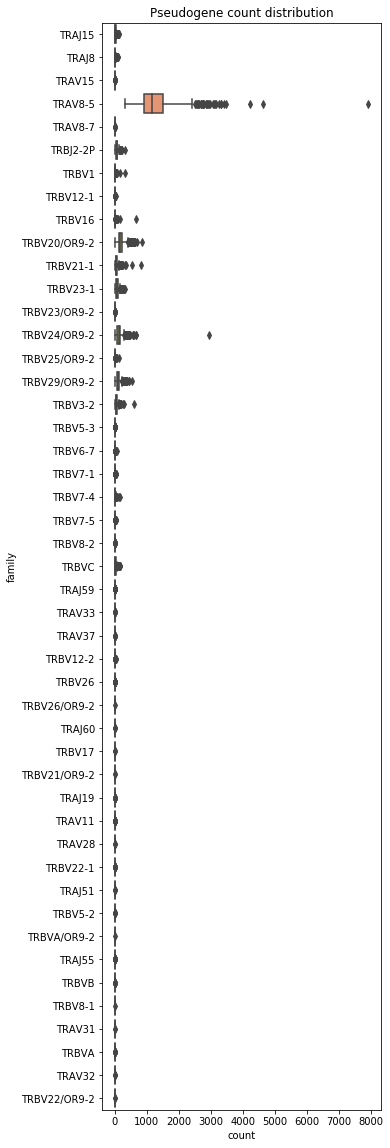

In [16]:
fig, ax = plt.subplots(figsize=(5, 20))
ax = sns.boxplot(x="count", y="family", data=pseudogene_counts_df)
plt.title("pseudogene count distribution")

Text(0.5, 1.0, 'non-pseudogene count distribution')

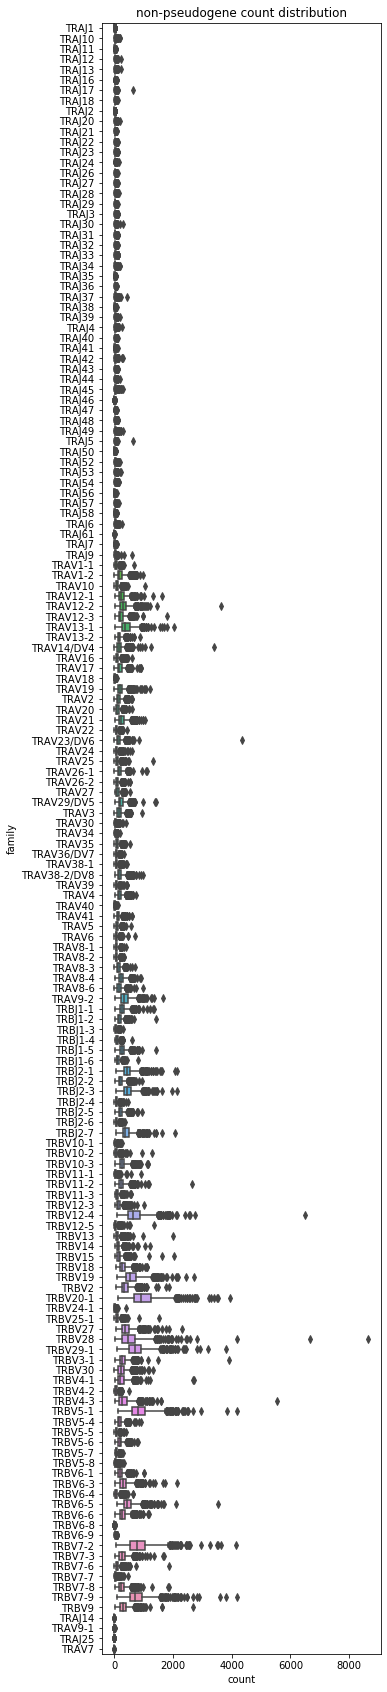

In [20]:
fig, ax = plt.subplots(figsize=(5, 30))
ax = sns.boxplot(x="count", y="family", data=realgene_counts_df)
plt.title("non-pseudogene count distribution")

In [23]:
usage_df = pd.read_csv("DGN_usage_df.csv")

In [26]:
pseudogene_usage_df = usage_df[~usage_df['family'].isin(valid_TCR_genes)]
realgene_usage_df = usage_df[usage_df['family'].isin(valid_TCR_genes)]

Text(0.5, 1.0, 'pseudogene usage distribution')

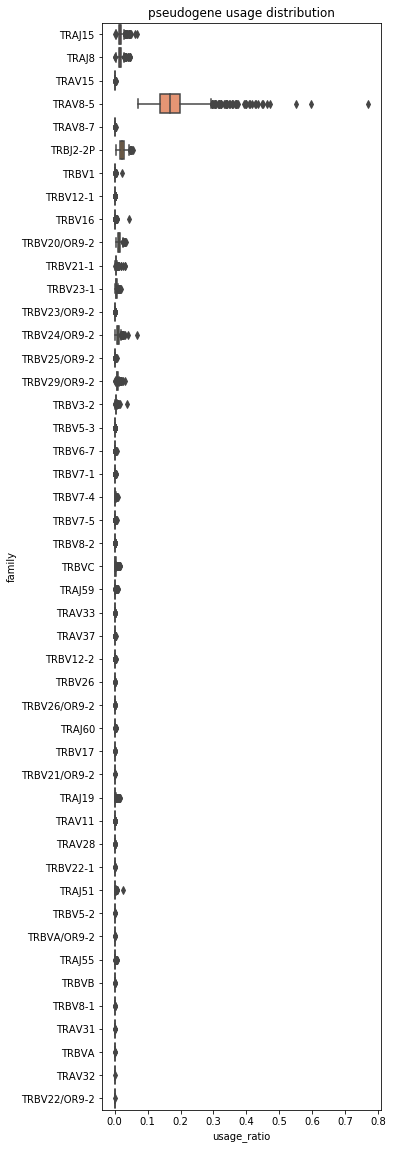

In [29]:
fig, ax = plt.subplots(figsize=(5, 20))
ax = sns.boxplot(x="usage_ratio", y="family", data=pseudogene_usage_df)
plt.title("pseudogene usage distribution")

Text(0.5, 1.0, 'non-pseudogene usage distribution')

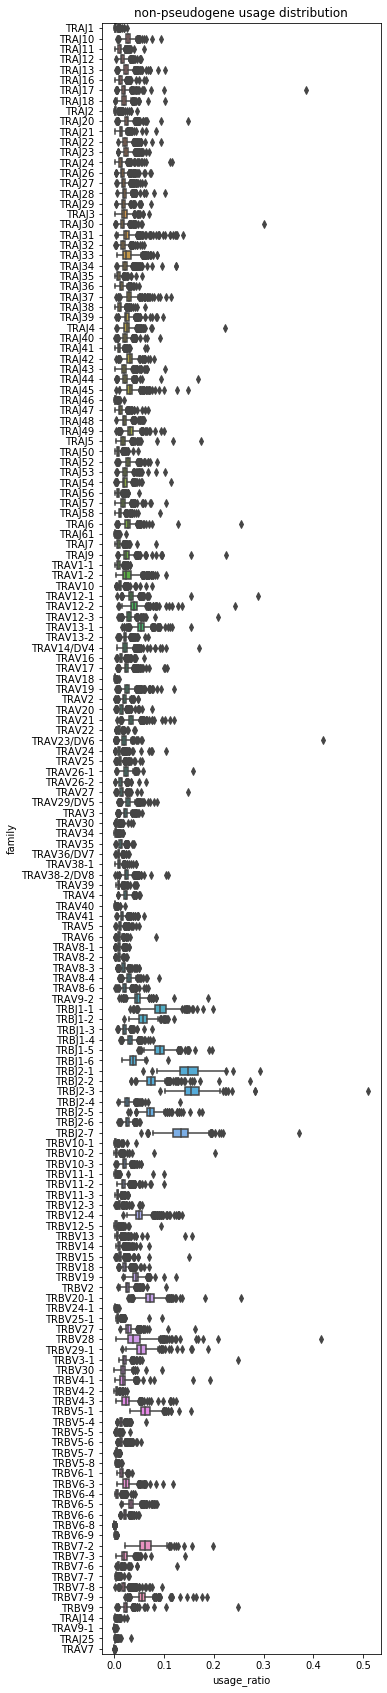

In [30]:
fig, ax = plt.subplots(figsize=(5, 30))
ax = sns.boxplot(x="usage_ratio", y="family", data=realgene_usage_df)
plt.title("non-pseudogene usage distribution")

In [36]:
usage_table = pd.read_csv("DGN_usage_table.csv").set_index("patid")
usage_table_nopseudo = pd.read_csv("DGN_usage_table_nopseudo.csv").set_index("patid")

In [59]:
r, p = scipy.stats.pearsonr(usage_table['TRAV13-1'], usage_table['TRAV8-5'])
r, p

(-0.2875775239046726, 1.67330010015955e-18)

In [38]:
df1 = usage_table.mean().to_frame("pseudo_mean")
df2 = usage_table_nopseudo.mean().to_frame("nopseudo_mean")

In [39]:
merged_df = pd.merge(df1, df2, left_index=True, right_index=True, how="inner").fillna(0.0) # merge on TCR
merged_df = merged_df.reset_index().rename(columns={"index":"TCR"})
merged_df['segment'] = merged_df['TCR'].str.slice(start=0, stop=4)
dataset1_name, dataset2_name = merged_df.columns[1], merged_df.columns[2]

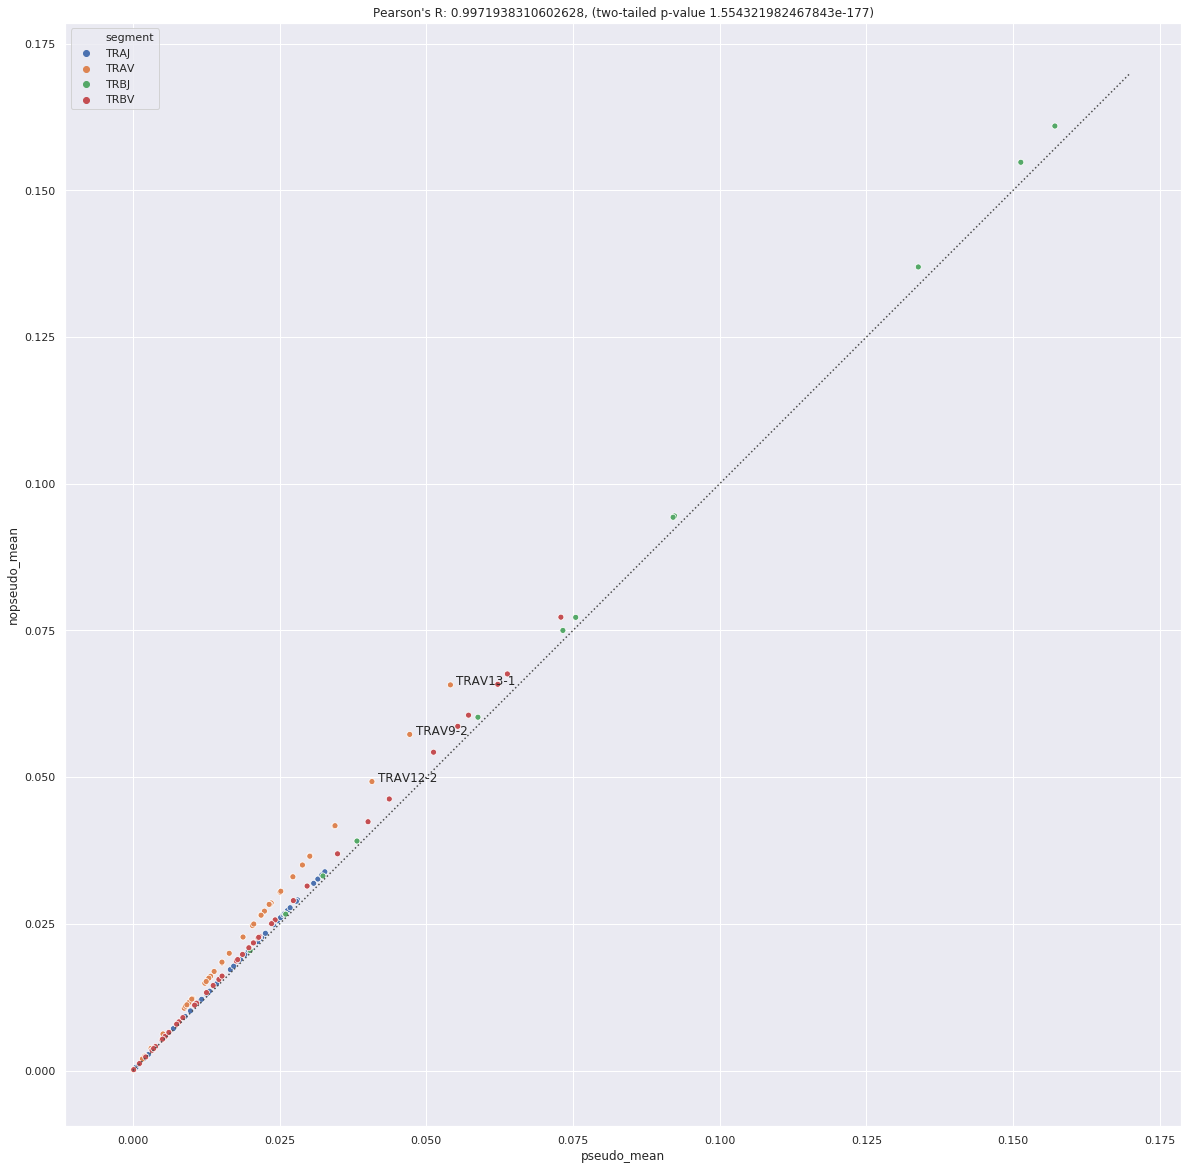

In [55]:
segment = "" # change this flag for different plots
plot_df = merged_df
if segment:
    plot_df = merged_df[merged_df['segment']==segment] # comment this out to get all segments

r, p = scipy.stats.pearsonr(plot_df[dataset1_name], plot_df[dataset2_name])

sns.set()
fig, ax = plt.subplots(figsize=(20,60))
sns.scatterplot(x=dataset1_name, y=dataset2_name, hue="segment", data=plot_df)
#plt.xlim(-0.01, 0.16)
#plt.ylim(-0.01, 0.16)

plt.plot([0, 0.17], [0, 0.17], ls="dotted", c=".3")

plt.xlabel(dataset1_name)
plt.ylabel(dataset2_name)
plt.title("Pearson's R: {}, (two-tailed p-value {})".format(r, p))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if abs(point['x']-point['y']) > 0.008:
        # if point['x']>0.02 or point['y']>0.025:
        # if str(point['val']) in ['TRAV23/DV6', 'TRAV13-1', 'TRAV10-1', 'TRAV17']:
            ax.text(point['x']+.001, point['y'], str(point['val']))

label_point(plot_df[dataset1_name], plot_df[dataset2_name], plot_df.TCR, plt.gca())

ax.set_aspect('equal', 'box')

# ax.errorbar(plot_df[dataset1_name].values, plot_df[dataset2_name].values, yerr=0.01, xerr=0.01,
#             fmt='o', ecolor='g', capthick=2)

In [63]:
merged_df['diff'] = merged_df['nopseudo_mean']-merged_df['pseudo_mean']

In [67]:
merged_df.sort_values('diff', ascending=False).head(15)

,TCR,pseudo_mean,nopseudo_mean,segment,diff
60,TRAV13-1,0.054114,0.065724,TRAV,0.011610
98,TRAV9-2,0.047180,0.057284,TRAV,0.010104
58,TRAV12-2,0.040742,0.049247,TRAV,0.008505
57,TRAV12-1,0.034318,0.041664,TRAV,0.007346
69,TRAV21,0.034449,0.041728,TRAV,0.007278
59,TRAV12-3,0.030172,0.036631,TRAV,0.006459
95,TRAV8-4,0.030149,0.036523,TRAV,0.006374
77,TRAV29/DV5,0.028895,0.035025,TRAV,0.006130
55,TRAV1-2,0.027202,0.033007,TRAV,0.005804
66,TRAV19,0.027271,0.033024,TRAV,0.005753


In [79]:
dgn_pseudogenes = {'TRAJ15', 'TRAJ8', 'TRAV15', 'TRAV8-5', 'TRAV8-7', 'TRBJ2-2P',
       'TRBV1', 'TRBV12-1', 'TRBV16', 'TRBV20/OR9-2', 'TRBV21-1',
       'TRBV23-1', 'TRBV23/OR9-2', 'TRBV24/OR9-2', 'TRBV25/OR9-2',
       'TRBV29/OR9-2', 'TRBV3-2', 'TRBV5-3', 'TRBV6-7', 'TRBV7-1',
       'TRBV7-4', 'TRBV7-5', 'TRBV8-2', 'TRBVC', 'TRAJ59', 'TRAV33',
       'TRAV37', 'TRBV12-2', 'TRBV26', 'TRBV26/OR9-2', 'TRAJ60', 'TRBV17',
       'TRBV21/OR9-2', 'TRAJ19', 'TRAV11', 'TRAV28', 'TRBV22-1', 'TRAJ51',
       'TRBV5-2', 'TRBVA/OR9-2', 'TRAJ55', 'TRBVB', 'TRBV8-1', 'TRAV31',
       'TRBVA', 'TRAV32', 'TRBV22/OR9-2'}

sharon_pseudogenes = {'TRAJ15',
 'TRAJ8',
 'TRAV8-5',
 'TRBJ2-2P',
 'TRBV1',
 'TRBV12-1',
 'TRBV12-2',
 'TRBV21-1',
 'TRBV23-1',
 'TRBV5-3',
 'TRBV6-7',
 'TRBV7-1',
 'TRBV7-4',
 'TRBV7-5',}

In [68]:
HLA_df = pd.read_csv("DGN_HLA_df.csv").set_index("patid").apply(lambda x: x > 0).astype("float")

In [70]:
pos301_patids = set(HLA_df[HLA_df['DQB1*03:01'] == 1.0].index)

In [81]:
for pseudogene in dgn_pseudogenes:
    pos301_values = usage_table[usage_table.index.isin(pos301_patids)][pseudogene].values
    neg301_values = usage_table[~usage_table.index.isin(pos301_patids)][pseudogene].values
    print(pseudogene, scipy.stats.ttest_ind(pos301_values, neg301_values))

TRBV21-1 Ttest_indResult(statistic=-0.25572497409824313, pvalue=0.7982221005693799)
TRBV1 Ttest_indResult(statistic=-1.4328548596180108, pvalue=0.15224929489254438)
TRBV26 Ttest_indResult(statistic=1.1470250985638273, pvalue=0.2516784712454535)
TRBV22/OR9-2 Ttest_indResult(statistic=-0.5024098065098795, pvalue=0.6155031472325803)
TRBV22-1 Ttest_indResult(statistic=1.4429687082028904, pvalue=0.14937995400897391)
TRAJ8 Ttest_indResult(statistic=-0.35672275294433203, pvalue=0.721383641792956)
TRBVC Ttest_indResult(statistic=-0.8525557738298264, pvalue=0.39413429109828546)
TRBV23/OR9-2 Ttest_indResult(statistic=-0.13745629445251137, pvalue=0.8907011221862582)
TRAJ59 Ttest_indResult(statistic=0.4448816972719207, pvalue=0.6565130581855909)
TRBV20/OR9-2 Ttest_indResult(statistic=2.045986933470016, pvalue=0.041050114041776914)
TRAV11 Ttest_indResult(statistic=-1.1009357844699672, pvalue=0.27122126959275134)
TRBV24/OR9-2 Ttest_indResult(statistic=-1.0079429440558552, pvalue=0.3137548844651369)


In [86]:
pseudogene = "TRAV13-1"
pos301_values = usage_table_nopseudo[usage_table_nopseudo.index.isin(pos301_patids)][pseudogene].values
neg301_values = usage_table_nopseudo[~usage_table_nopseudo.index.isin(pos301_patids)][pseudogene].values
print(pseudogene, scipy.stats.ttest_ind(pos301_values, neg301_values))

TRAV13-1 Ttest_indResult(statistic=3.8059267267519683, pvalue=0.00015090977610923318)


In [1]:
sharon_counts_df = pd.read_csv("gene_counts.tsv", delimiter="\t")

sharon_counts_df = sharon_counts_df.transpose()

sharon_counts_df

TRAV8_cols = [x for x in sharon_counts_df.columns if x.startswith("TRAV8")]

sharon_TRAV8_table = sharon_counts_df[TRAV8_cols]

sharon_TRAV8_df = pd.melt(sharon_TRAV8_table).rename(columns={"variable":"family", "value":"count"})

sns.boxplot(x="count", y="family", data=sharon_TRAV8_df)
plt.title("Sharon TRAV8-x distribution")

NameError: name 'pd' is not defined

Text(0.5, 1.0, 'BLAST TRAV8-x distribution')

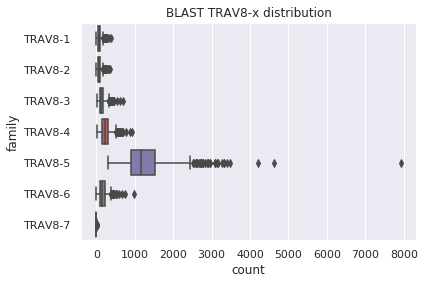

In [91]:
dgn_TRAV8_df = counts_df[counts_df['family'].str.startswith("TRAV8")]
sns.boxplot(x="count", y="family", data=dgn_TRAV8_df)
plt.title("BLAST TRAV8-x distribution")